In [1]:
# Here dignosis is the depenent variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('C:/Users/Abhi/Desktop/CSV files/Breast cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignenat 212


C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


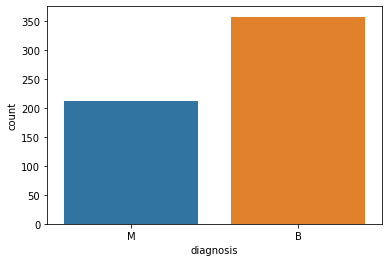

In [4]:
# To know quantity
ax = sns.countplot(data['diagnosis'], label = 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign',B)
print('Malignenat',M)

In [5]:
X = data.iloc[:,2:32].values
y = data.iloc[:,1].values

In [6]:
# Encoding categorical data 
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [7]:
# splitting data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
X_test

array([[-0.47853809, -0.21371678, -0.45835473, ..., -0.27372978,
         0.07289581,  0.09152022],
       [ 1.37424404,  0.38950001,  1.29239853, ...,  0.84579664,
        -0.67110896, -1.02766663],
       [ 0.37769352, -0.01783827,  0.3904579 , ...,  0.44803208,
        -0.21152934, -0.28706636],
       ...,
       [-0.88804017, -0.60769971, -0.87720113, ..., -0.66701045,
         0.04718507, -0.35853687],
       [ 1.62338166,  0.57647495,  1.55597935, ...,  1.71220016,
        -0.32240694, -0.49629888],
       [-1.11140494, -1.63383602, -1.09012501, ..., -0.77332207,
        -0.05083716, -0.44088334]])

In [10]:
import tensorflow 
import keras
from keras.models import Sequential 
from keras.layers import Dense

In [11]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape = (30,), activation  = 'relu'),
    keras.layers.Dense(30, activation  = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [12]:
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)


Epoch 1/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.4648
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7934
Epoch 3/10
14/14 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.9413
Epoch 4/10
14/14 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.9601
Epoch 5/10
14/14 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9601
Epoch 6/10
14/14 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9601
Epoch 7/10
14/14 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9671
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9671
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9742
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9789
